In [3]:
# Cell 1: Setup
from data_loader import *
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 14})


/var/folders/l1/x0797x3512d9sktcpm47npbh0000gn/T/ipykernel_3789/2506610126.py:23: RuntimeWarning: invalid value encountered in log
  r_x = np.log(x[dt:] / x[:-dt])


Δt=1: n=278092, mean=nan, var=nan
Δt=5: n=274892, mean=nan, var=nan
Δt=20: n=263136, mean=nan, var=nan
Δt=100: n=210586, mean=nan, var=nan
Δt=400: n=83146, mean=nan, var=nan
Δt=700: n=5342, mean=nan, var=nan


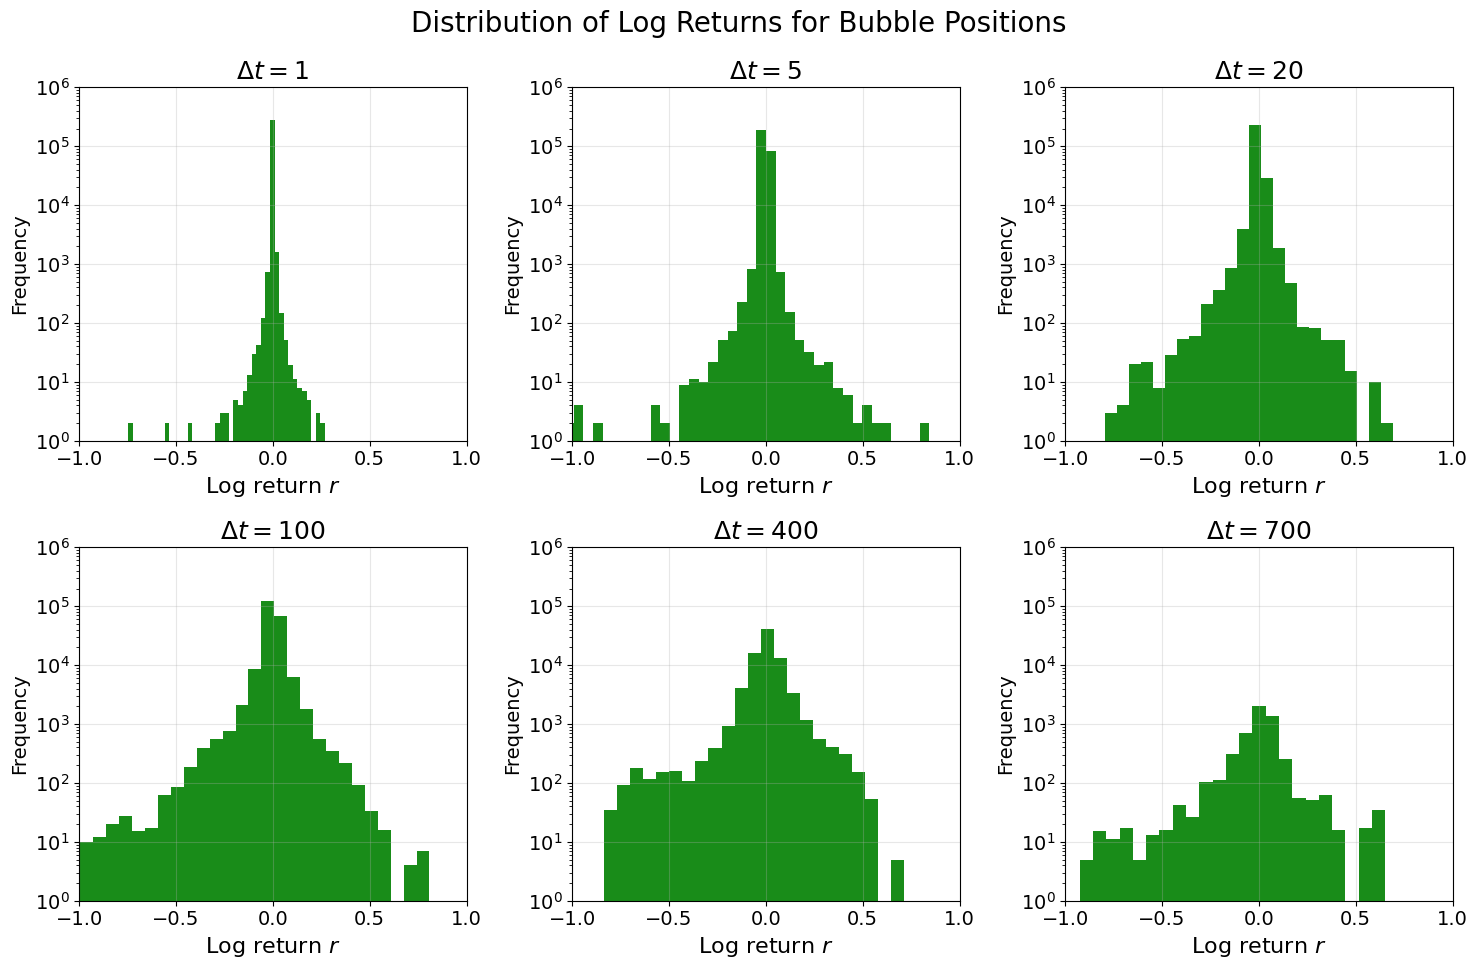

In [4]:

# Log Returns for Multiple dt Values
dt_values = [1, 5, 20, 100, 400, 700]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()
plt.suptitle('Distribution of Log Returns for Bubble Positions', 
             fontsize=20, y=0.97)

for idx, dt in enumerate(dt_values):
    log_ret_x, log_ret_y = [], []
    
    for bubble_id, g in df_corrected.groupby("id"):
        g = g.sort_values("timestep").copy()
        x, y = g["x"].to_numpy(), g["y"].to_numpy()
        
        if len(x) <= dt:
            continue
        
        eps = 1e-6
        valid_x = (np.abs(x[:-dt]) > eps)
        valid_y = (np.abs(y[:-dt]) > eps)
        
        r_x = np.log(x[dt:] / x[:-dt])
        r_y = np.log(y[dt:] / y[:-dt])
        
        log_ret_x.extend(r_x[valid_x])
        log_ret_y.extend(r_y[valid_y])
    
    all_r = np.concatenate([log_ret_x, log_ret_y])
    
    axs[idx].hist(all_r, bins=80, alpha=0.9, color='green')
    axs[idx].set_title(rf"$\Delta t = {dt}$", fontsize=18)
    axs[idx].grid(alpha=0.3)
    axs[idx].set_yscale('log')
    axs[idx].set_xlim(-1, 1)
    axs[idx].set_ylim(1, 1e6)
    axs[idx].set_xlabel(r"Log return $r$", fontsize=16)
    axs[idx].set_ylabel("Frequency")
    
    mean_r, var_r = np.mean(all_r), np.var(all_r)
    print(f"Δt={dt}: n={len(all_r)}, mean={mean_r:.5e}, var={var_r:.5e}")

plt.tight_layout(rect=[0, 0, 1, 0.99])
# plt.savefig("Figures/log_returns.png", dpi=300, bbox_inches='tight')
plt.show()